In [2]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [3]:
mnist = tf.keras.datasets.fashion_mnist

In [4]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0

test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images / 255.0

In [50]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [51]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [52]:
model.fit(training_images, training_labels, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5928 - accuracy: 0.7849
Epoch 2/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3034 - accuracy: 0.8883
Epoch 3/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2442 - accuracy: 0.9107
Epoch 4/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2139 - accuracy: 0.9208
Epoch 5/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1809 - accuracy: 0.9323
Epoch 6/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1634 - accuracy: 0.9396
Epoch 7/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1417 - accuracy: 0.9461
Epoch 8/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1247 - accuracy: 0.9524
Epoch 9/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1068 - accuracy: 0.9598
Epoch 10/20
1875/1875 [==============================] - 14s 8ms/step - l

In [49]:
test_loss = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3245 - accuracy: 0.8852


In [33]:
# Visualizing the Convolution
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


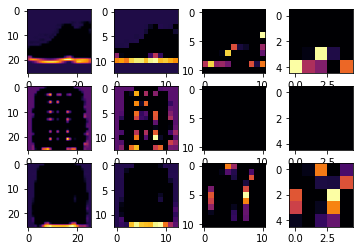

In [37]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3, 4)
FIRST_IMAGE = 0
SECOND_IMAGE = 7
THIRD_IMAGE = 26
CONVOLUTION_NUMBER = 1

from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1,28,28,1))[x]
    axarr[0,x].imshow(f1[0, : , : , CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
    
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1,28,28,1))[x]
    axarr[1,x].imshow(f2[0, : , : , CONVOLUTION_NUMBER], cmap='inferno')
    axarr[1,x].grid(False)
    
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1,28,28,1))[x]
    axarr[2,x].imshow(f3[0, : , : , CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)